In [245]:
import scipy.io as scio
import matplotlib.pyplot as mp
import numpy as np

In [246]:
tmp = scio.loadmat('ml_1m.mat')

In [247]:
Xsp = tmp['X'].toarray()

In [248]:
print(Xsp)

[[5. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


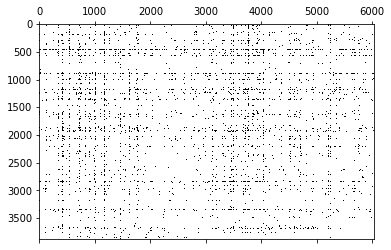

In [249]:
mp.spy(Xsp)

In [250]:
r,c = Xsp.shape

In [251]:
print(r)

3883


In [252]:
mask = Xsp==1
mx = np.ma.array(Xsp, mask = mask)
M = np.multiply(mask,Xsp)

(3883, 6040)
(3883, 6040)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


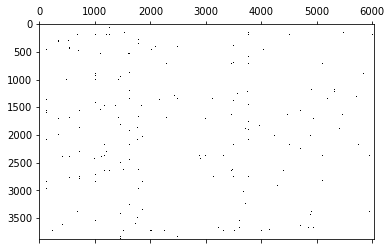

In [253]:
from scipy import sparse
print(Xsp.shape)
print(mask.shape)
print(M)
mp.spy(M)

In [254]:
I,J = Xsp.shape
print(I,J)

3883 6040


In [255]:
N = sparse.csc_matrix(Xsp).nnz
print(N)

1000209


In [256]:
print("Only " + str(round(100*N/(I*J),2)) + " percent of the matrix is full")

Only 4.26 percent of the matrix is full


In [257]:
# create a list of the elements, which will be useful later
idx = np.where(Xsp)

In [258]:
XList = idx[0]
YList = idx[1]
VList = Xsp[idx]
print(idx)

(array([   0,    0,    0, ..., 3882, 3882, 3882]), array([   0,    5,    7, ..., 5836, 5926, 5997]))


In [259]:
print(Xsp[idx])

[5. 4. 4. ... 4. 1. 4.]


In [278]:
# initialize the factor matrices
K = 10
W = np.dot(1,np.random.randn(I,K))
H = np.dot(1,np.random.randn(K,J))

In [279]:
# stochastic gradient descent
batchSize = 500; # the number of elements that we will use at each iteration
eta = 0.03; # step-size
numIter = 100;
rmse_sgd = np.zeros((numIter,1))

In [280]:
for t in range(numIter):
    # get a random batch from the data
    data_index = np.random.permutation(N)[:batchSize]
#     print(data_index)
    # this vector will contain some random numbers between 1 and N. 
    # Its size should be batchSize. You can use the function randperm    
    # for each element in the data batch, update the corresponding elements
    # in W and H
    for i in range(batchSize):
        # for each element in the batch, find its corresponding 'i', 'j',
        # and value by using the Xlist array
#         print(data_index[i])
#         print(W[cur_i,:])
        cur_i = XList[data_index[i]]
        cur_j = YList[data_index[i]]
        cur_x = VList[data_index[i]]
        # compute the current xhat, for the current i and j
        cur_xhat = np.dot(W[cur_i,:],H[:,cur_j])
        # compute the gradients for the 'corresponding elements' of W and H
        # not all the elements of W and H will be updated
        # grad_w = (X - WH) * H'
        # grad_h = W' * (X - WH)
        grad_w = np.dot((cur_x - cur_xhat), np.mat(H[:, cur_j]))
        grad_h = np.dot(np.mat(W[cur_i, :]),(cur_x - cur_xhat))
        
        # take a gradient step
        W[cur_i,:] = W[cur_i,:] + eta * grad_w
        H[:,cur_j] = H[:,cur_j] + eta * grad_h
#         break
    # compute the root-mean-squared error
#     rmse_sgd[t] = sqrt(sum(sum(((M.*(W*H))-Xsp).^2))/N)
#     print(M)
#     print(np.dot(W,H))
    rmse_sgd[t] = np.sqrt((np.linalg.norm(np.multiply(M,(Xsp - np.dot(W,H)))))**2/N)
#     rmse_sgd[t] = np.sqrt(sum(sum((np.multiply(M,np.dot(W,H))-Xsp)**2))/N)
    print("Iteration " + str(t))
    print(rmse_sgd[t])
#     break

[764870 337496 572578 387747 192922  49157 217079   4273 948092 416839
 443747 479620 670665 370335 190423 239692 419122 510860 242781 455747
 163926 911388 825681 743599 818480 162730 484433 449353 327998 348994
 143260 801351 455480 170168 641144  37719 127967 623535 720738 799173
 803653 788771  28951 689131 760565 671649 652938 788359 115460 527898
 416344 910290 563268 624684 865667 468858 864014 982925 182147 762446
 706149 842257 926576 615964 838694 146585  30697 751594 812712 966844
 918939 164793 672729 942629 197941 434322 492751 448133 144427 146209
 578256 974204 831289 855584 561926 339396 585889 234803 803804  79308
 476444 172949 915822 540226 108315 804455 247476 716476  53795 131898
 409068 182862 540041 823382 385980 184800  16855 587822 811984 383087
 865562 628725 407039   5951 296705 326753  65342 183550 408084 138240
 436355 346063 956404 645860 444158 660696 874997 416364 514596 502582
 468922 454683 819284 756183 938054 283673 570513 259091 699748 968570
 12037

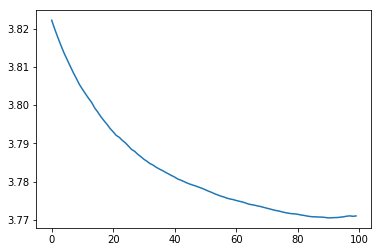

In [270]:
import matplotlib.pylab as plt
f, ax = plt.subplots(1,1)
plt.plot(rmse_sgd)
plt.show()

In [282]:
user_index = 11
print(M[:,user_index])

[0. 0. 0. ... 0. 0. 0.]


In [290]:
# Make recommendations
user_index = 11
# use W, H, and M to compute a 'movie_index' for the user
user_xhat = np.multiply(M[:,user_index],np.dot(W,H[:,user_index]))
# [xx,movie_index] = max(user_xhat);%todo
print(M[:,user_index])
print(np.dot(W,H[:,user_index]))
print(user_xhat)

[0. 0. 0. ... 0. 0. 0.]
[-1.49770063 -0.77067421 -0.18980301 ... -0.60232763 -0.74553166
  0.9142169 ]
[-0. -0. -0. ... -0. -0.  0.]


In [288]:
idx = np.where(user_xhat)
print(idx)

(array([2547]),)
